# Simulate a solargraph

I'll try to simulate a solargraph (made with a [SolarCan](https://solarcan.co.uk) or a [hand-made](http://xyzon.nl/solargraphschoolproject/) tin pinhole camera).

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.coordinates import AltAz, EarthLocation, get_sun
from astropy.time import Time
import astropy.units as u
import numpy as np

The position of the Sun depends on the coordinates of the camera. This can of course be done much more accurately.

In [2]:
dwl = EarthLocation.of_address("Dwingeloo")

I'll center the plot on the approximate average local noon.

In [3]:
maxtime = Time("2020-06-21T11:35:00")

Now some coordinates. To get the image coordinates $x$, $y$ from the azimuth $\gamma$ and altitude $\alpha$, let's first choose convenient scalings. Let $x$ run from $-180˚$ to $+180˚$ (we can later scale with a scaling factor in degrees per cm or so). The paper is rolled up in the can, so $x=0$ will be directly opposite the pin hole. Choose the origin of the azimuth $\gamma$ to be straight out of the pinhole, as illustrated below.

<img src="diagram.png">

Now we have $x = 2\gamma$, so that when $\gamma$ runs from $-180˚$ to $+180˚$, $x$ spans the whole paper.

To get the $y$ coordinate, we can use the horizontal distance to the tin can $f_h$. This is the [chord](https://en.wikipedia.org/wiki/Chord_(geometry)) of $180˚-x$, which is
$
f_h=2\sin((180˚-x)/2=2\cos(x/2)
$.

The $y$ coordinate now is $f_h \cdot \tan(\alpha)$ (where $\alpha$ is the incoming altitude).

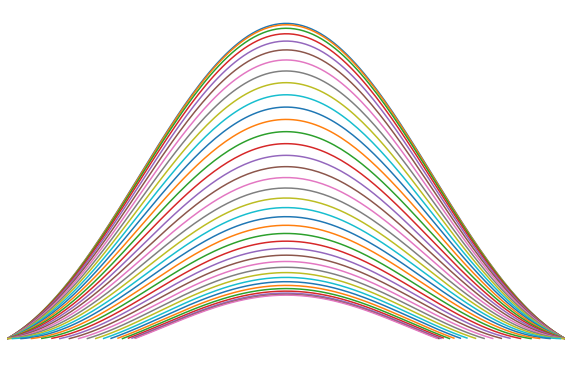

In [5]:
basetimes = maxtime - 9 * u.hour + np.linspace(0, 18, 341) * u.hour

fig, ax = plt.subplots(figsize=(10,10))

for nr, offset in enumerate(np.arange(0, 365//2, 5) * u.day):
    times = basetimes + offset

    aa = get_sun(times).transform_to(AltAz(location=dwl, obstime=times))
    gamma = aa.az
    alpha = aa.alt
    x = 2 * (gamma - 180 * u.deg)
    y = np.rad2deg((2 * np.cos(x / 2) * np.tan(alpha)).value)
    y[aa.alt < 0] = np.nan
    
    ax.plot(x, y)
ax.set_xlim(-180, 180)
ax.set_axis_off()
ax.set_aspect(1)
fig.savefig("solargraph-theoretic.pdf", bbox_inches='tight', transparent=True, dpi=200)